# Прикладная статистика и анализ данных
## Задание 2.1


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Теоретические задачи необходимо оформить в latex/markdown и прислать `pdf` или же прислать фотку в правильной ориентации рукописного решения, где **все четко видно**.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Баллы за задание:**

* Задача 1 — 1 балл
* Задача 2 — 1 балл
* Задача 3 — 3 балла
* Задача 4 — 6 баллов
* Задача 5 — 6 баллов

----


In [182]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import warnings
warnings.filterwarnings("ignore")
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

%matplotlib inline

### Задача 1
Вам выдается сводная статистика о посетителях сайта mipt-stats.gitlab.io, а также вики-страниц и Яндекс-форм Физтех.Статистики за последние 3 месяца. В каждой ячейке таблицы записано количество посетителей определенного условия, которые хотя бы раз посетили указанные выше ресурсы. Пол посетителя определяется технологией Яндекс.Метрики.

In [3]:
data = pd.DataFrame(
    {'Мужской': [644, 235, 208, 68, 20, 20],
     'Женский': [257, 109, 84, 14, 13, 11]},
    index=['Chrome', 'Chrome Mobile', 'Яндекс Браузер', 'Firefox', 'Mobile Safari', 'Safari']    
)
data

,Мужской,Женский
Chrome,644,257
Chrome Mobile,235,109
Яндекс Браузер,208,84
Firefox,68,14
Mobile Safari,20,13
Safari,20,11


Проверьте гипотезу о том, что тип используемого браузера не зависит от пола посетителя. Сделайте вывод.

In [4]:
chi, pval = sps.chi2_contingency(data)[:2]
print(f'статистика критерия: {chi}')
print(f'p-value критерия: {pval}')
print(f'отвергается ли критерий? {pval < 0.05}')

статистика критерия: 9.34260661681269
p-value критерия: 0.09615462810186239
отвергается ли критерий? False


Посчитаем также коэффициент корреляции Крамера.

In [5]:
n = np.sum(data['Мужской'].to_numpy()) + np.sum(data['Женский'].to_numpy())
phi = np.sqrt(chi / n)
phi

0.07450612442500706

**Вывод:** гипотеза о независимости браузера от пола посетителя не отвергается, коэффициент корреляции Крамера близок к нулю, значит, скорее всего, выбор браузера не зависит от пола.

### Задача 2

Можно ли на уровне значимости 0.05 считать, что последовательность чисел 

    1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17 
    
является реализацией случайного вектора, все 10 компонент которого независимые одинаково распределенные случайные величины? Вывод сделайте на основе коэффициентов корреляции.

In [14]:
Z = np.array([1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17])
X = Z[:5]
Y = Z[5:]
corr = np.corrcoef(X, Y)[0, 1]
corr

0.9485269820357344

In [15]:
n = 5
T = corr * np.sqrt(n - 2) / np.sqrt(1 - corr ** 2)
T

5.187609638938912

In [17]:
pval = sps.t(df=n - 2).sf(T)
print(f'статистика критерия: {T}')
print(f'p-value критерия: {pval}')
print(f'отвергается ли критерий? {pval < 0.05}')

статистика критерия: 5.187609638938912
p-value критерия: 0.006954908862497154
отвергается ли критерий? True


**Вывод:** гипотеза о независимости браузера от пола посетителя отвергается, коэффициент корреляции Крамера близок к единице, значит, выбор выборку нельзя считать независимой.

### Задача 3

Получите критерий хи-квадрат для таблиц сопряженности, сведя задачу к обобщенному критерию хи-квадрат из предыдущего семестра. Статистика критерия была дана на лекции.

### Задача 4

Даны выборки $X = (X_1, ..., X_n), Y = (Y_1, ..., Y_n)$. Рассмотрим произвольную функцию $f: \mathbb{R}^2 \to \mathbb{R}$, для которой выполнено $f(x, y) = -f(y, x)$. Для любых $1 \leqslant i < j \leqslant n$ положим $c_{ij}(X) = f(X_i, X_j)$. Обобщенным коэффициентом корреляции называется следующая статистика:
$$\widehat{r} = \frac{\sum\limits_{i<j} c_{ij}(X) c_{ij}(Y)}{\sqrt{\sum\limits\limits_{i<j} c_{ij}(X)^2 \sum\limits\limits_{i<j} c_{ij}(Y)^2}}.$$

Докажите, что это действительно выборочный коэффициент корреляции, т.е. что
$\left| \widehat{r} \right| \leqslant 1$ и значения $\pm 1$ достигаются, а также что при верной гипотезе о независимости выборок $\mathsf{E} \widehat{r} = 0$.
	
Найдите коэффициенты корреляции Пирсона, Спирмэна и Кэндалла с помощью обобщенного коэффициента корреляции.

### Задача 5

Скачайте <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing">данные</a> маркетинговых кампаний португальского банковского учреждения. Цель задачи &mdash; с целью дальнейшего исследования понять, какие условия (среди 20 признаков) влияют на подписание клиентом срочного депозита (величина $y$). Выполните задачу двумя способами:

* методами анализа зависимостей, выяснив, какие характеристики клиента оказывают влияние на целевую переменную, и указав степень влияния;
	
* вычислив важность признаков, полученной с помощью Random Forest, разбив предварительно данные на обучающую и тестовую части.
	
Проинтерпретируйте полученные результаты.
	
*Напоминание*: в случае отбора признаков с целью дальнейшего исследования можно применять методы, контролирующие FDR на уровне не более 0.1.

Первая часть: методами анализа зависимостей, выяснив, какие характеристики клиента оказывают влияние на целевую переменную, и указав степень влияния.

In [21]:
data = pd.read_csv('bank-additional.csv', delimiter=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [42]:
data['y'][data['y'] == 'no'] = 0
data['y'][data['y'] == 'yes'] = 1

Разбиваем на бины вещественные признаки, объединяем бины, в которых не хватает элеметов, и считаем p-value.

In [107]:
pvals = {}

In [25]:
real_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 
                 'cons.conf.idx', 'euribor3m', 'nr.employed']
data_real = data[real_features]
data_real

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,93.918,-42.7,4.958,5228.1
4115,39,219,1,999,0,93.918,-42.7,4.959,5228.1
4116,27,64,2,999,1,92.893,-46.2,1.354,5099.1
4117,58,528,1,999,0,93.444,-36.1,4.966,5228.1


**Age**

In [53]:
age_bins = np.histogram2d(data['y'], data_real['age'], bins=(2, 10))[0]
age_bins

array([[  86.,  717., 1079.,  734.,  554.,  429.,   43.,   15.,    8.,
           3.],
       [  12.,  104.,  108.,   70.,   62.,   54.,   18.,    7.,   10.,
           6.]])

In [55]:
age_bins[:, 8] = age_bins[:, 8] + age_bins[:, 9]
age_bins = age_bins[:, :9]
age_bins

array([[  86.,  717., 1079.,  734.,  554.,  429.,   43.,   15.,   11.],
       [  12.,  104.,  108.,   70.,   62.,   54.,   18.,    7.,   16.]])

In [109]:
pvals['age'] = sps.chi2_contingency(age_bins)[1]
pvals

{'age': 1.24519438858919e-19}

**Duration**

In [57]:
dur_bins = np.histogram2d(data['y'], data_real['duration'], bins=(2, 10))[0]
dur_bins

array([[3.11e+03, 4.70e+02, 6.20e+01, 1.90e+01, 5.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.83e+02, 1.47e+02, 7.30e+01, 3.80e+01, 4.00e+00, 3.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]])

In [59]:
dur_bins[:, 4] = np.sum(dur_bins[:, 4:], axis=1)
dur_bins = dur_bins[:, :5]
dur_bins

array([[3110.,  470.,   62.,   19.,    7.],
       [ 183.,  147.,   73.,   38.,   10.]])

In [110]:
pvals['dur'] = sps.chi2_contingency(dur_bins)[1]
pvals

{'age': 1.24519438858919e-19, 'dur': 2.70516349268418e-146}

**Campaign**

In [63]:
cam_bins = np.histogram2d(data['y'], data_real['campaign'], bins=(2, 15))[0]
cam_bins

array([[2.952e+03, 3.920e+02, 1.540e+02, 8.400e+01, 3.400e+01, 1.700e+01,
        9.000e+00, 1.700e+01, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00],
       [4.000e+02, 4.100e+01, 5.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00]])

In [64]:
cam_bins[:, 3] = np.sum(cam_bins[:, 3:], axis=1)
cam_bins = cam_bins[:, :4]
cam_bins

array([[2952.,  392.,  154.,  170.],
       [ 400.,   41.,    5.,    5.]])

In [111]:
pvals['cam'] = sps.chi2_contingency(cam_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06}

**Pdays**

In [65]:
pds_bins = np.histogram2d(data['y'], data_real['pdays'], bins=(2, 10))[0]
pds_bins

array([[  60.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3608.],
       [ 100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         351.]])

In [66]:
pds_bins = np.array([[60., 3608.], [100., 351.]])
pds_bins

array([[  60., 3608.],
       [ 100.,  351.]])

In [112]:
pvals['pds'] = sps.chi2_contingency(pds_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99}

**Previous**

In [68]:
pre_bins = np.histogram2d(data['y'], data_real['previous'], bins=(2, 8))[0]
pre_bins

array([[3.231e+03, 3.760e+02, 4.600e+01, 0.000e+00, 1.000e+01, 4.000e+00,
        0.000e+00, 1.000e+00],
       [2.920e+02, 9.900e+01, 3.200e+01, 0.000e+00, 1.500e+01, 1.000e+01,
        2.000e+00, 1.000e+00]])

In [69]:
pre_bins[:, 3] = np.sum(pre_bins[:, 3:], axis=1)
pre_bins = pre_bins[:, :4]
pre_bins

array([[3231.,  376.,   46.,   15.],
       [ 292.,   99.,   32.,   28.]])

In [113]:
pvals['pre'] = sps.chi2_contingency(pre_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59}

**Cons.price.idx**

In [72]:
cpi_bins = np.histogram2d(data['y'], data_real['cons.price.idx'], bins=(2, 8))[0]
cpi_bins

array([[ 107.,   30.,  777.,  882.,    8., 1391.,   38.,  435.],
       [  50.,   28.,  121.,   55.,   12.,  114.,   31.,   40.]])

In [114]:
pvals['cpi'] = sps.chi2_contingency(cpi_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68}

**Cons.conf.idx**

In [74]:
cci_bins = np.histogram2d(data['y'], data_real['cons.conf.idx'], bins=(2, 8))[0]
cci_bins

array([[  39.,  721.,  993.,  491., 1275.,   33.,   71.,   45.],
       [  30.,   78.,   60.,   98.,   83.,   39.,   40.,   23.]])

In [115]:
pvals['cci'] = sps.chi2_contingency(cci_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83}

**Euribor3m**

In [100]:
eur_bins = np.histogram2d(data['y'], data_real['euribor3m'], bins=(2, 5))[0]
eur_bins

array([[1015.,   10.,    0.,  297., 2346.],
       [ 304.,   13.,    0.,   13.,  121.]])

In [101]:
eur_bins = np.concatenate((eur_bins[:, :2], eur_bins[:, 3:]), axis=1)
eur_bins

array([[1015.,   10.,  297., 2346.],
       [ 304.,   13.,   13.,  121.]])

In [116]:
pvals['eur'] = sps.chi2_contingency(eur_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76}

**Nr.employed**

In [103]:
nre_bins = np.histogram2d(data['y'], data_real['nr.employed'], bins=(2, 8))[0]
nre_bins

array([[  90.,   96.,    0.,  107.,  732.,    0.,  734., 1909.],
       [  80.,   89.,    0.,   57.,   91.,    0.,   25.,  109.]])

In [104]:
nre_bins = np.concatenate((nre_bins[:, :2], nre_bins[:, 3:5], nre_bins[:, 6:]), axis=1)
nre_bins

array([[  90.,   96.,  107.,  732.,  734., 1909.],
       [  80.,   89.,   57.,   91.,   25.,  109.]])

In [117]:
pvals['nre'] = sps.chi2_contingency(nre_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148}

Теперь проделаем аналогично с категориальными признаками.

In [177]:
columns = data.columns
categorial_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome', 'emp.var.rate']
data_categorial = data[categorial_features]
data_categorial

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,-1.8
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,1.1
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,1.4
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,1.4
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,-0.1
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,1.4
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,1.4
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,-1.8
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,1.4


**Job**

In [121]:
job_bins = pd.crosstab(data['y'], data_categorial['job']).to_numpy()
job_bins

array([[879, 823, 140,  99, 294, 128, 146, 358,  63, 611,  92,  35],
       [133,  61,   8,  11,  30,  38,  13,  35,  19,  80,  19,   4]],
      dtype=int64)

In [127]:
pvals['job'] = sps.chi2_contingency(job_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10}

**Marital**

In [129]:
mar_bins = pd.crosstab(data['y'], data_categorial['marital']).to_numpy()
mar_bins

array([[ 403, 2257,  998,   10],
       [  43,  252,  155,    1]], dtype=int64)

In [131]:
mar_bins[:, 2] = mar_bins[:, 2] + mar_bins[:, 3]
mar_bins = mar_bins[:, :3]
mar_bins

array([[ 403, 2257, 1008],
       [  43,  252,  156]], dtype=int64)

In [132]:
pvals['mar'] = sps.chi2_contingency(mar_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353}

**Education**

In [133]:
edu_bins = pd.crosstab(data['y'], data_categorial['education']).to_numpy()
edu_bins

array([[ 391,  211,  531,  824,    1,  470, 1099,  141],
       [  38,   17,   43,   97,    0,   65,  165,   26]], dtype=int64)

In [134]:
edu_bins[:, 5] = edu_bins[:, 4] + edu_bins[:, 5]
edu_bins = np.concatenate((edu_bins[:, :4], edu_bins[:, 5:]), axis=1)
edu_bins

array([[ 391,  211,  531,  824,  471, 1099,  141],
       [  38,   17,   43,   97,   65,  165,   26]], dtype=int64)

In [135]:
pvals['edu'] = sps.chi2_contingency(edu_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449}

**Default**

In [136]:
def_bins = pd.crosstab(data['y'], data_categorial['default']).to_numpy()
def_bins

array([[2913,  754,    1],
       [ 402,   49,    0]], dtype=int64)

In [137]:
def_bins[:, 1] = def_bins[:, 1] + def_bins[:, 2]
def_bins = def_bins[:, :2]
def_bins

array([[2913,  755],
       [ 402,   49]], dtype=int64)

In [138]:
pvals['def'] = sps.chi2_contingency(def_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06}

**Housing**

In [139]:
hou_bins = pd.crosstab(data['y'], data_categorial['housing']).to_numpy()
hou_bins

array([[1637,   96, 1935],
       [ 202,    9,  240]], dtype=int64)

In [140]:
pvals['hou'] = sps.chi2_contingency(hou_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06,
 'hou': 0.730743991844591}

**Loan**

In [141]:
loa_bins = pd.crosstab(data['y'], data_categorial['loan']).to_numpy()
loa_bins

array([[2975,   96,  597],
       [ 374,    9,   68]], dtype=int64)

In [142]:
pvals['loa'] = sps.chi2_contingency(loa_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06,
 'hou': 0.730743991844591,
 'loa': 0.5684489495019593}

**Contact**

In [143]:
con_bins = pd.crosstab(data['y'], data_categorial['contact']).to_numpy()
con_bins

array([[2277, 1391],
       [ 375,   76]], dtype=int64)

In [144]:
pvals['con'] = sps.chi2_contingency(con_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06,
 'hou': 0.730743991844591,
 'loa': 0.5684489495019593,
 'con': 1.8479997217891733e-18}

**Month**

In [145]:
mon_bins = pd.crosstab(data['y'], data_categorial['month']).to_numpy()
mon_bins

array([[ 179,  572,   10,  652,  462,   20, 1288,  403,   44,   38],
       [  36,   64,   12,   59,   68,   28,   90,   43,   25,   26]],
      dtype=int64)

In [146]:
pvals['mon'] = sps.chi2_contingency(mon_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06,
 'hou': 0.730743991844591,
 'loa': 0.5684489495019593,
 'con': 1.8479997217891733e-18,
 'mon': 2.8948750374216133e-59}

**Day_of_week**

In [147]:
dow_bins = pd.crosstab(data['y'], data_categorial['day_of_week']).to_numpy()
dow_bins

array([[685, 757, 764, 750, 712],
       [ 83,  98,  96,  91,  83]], dtype=int64)

In [148]:
pvals['dow'] = sps.chi2_contingency(dow_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06,
 'hou': 0.730743991844591,
 'loa': 0.5684489495019593,
 'con': 1.8479997217891733e-18,
 'mon': 2.8948750374216133e-59,
 'dow': 0.9723048648716545}

**Poutcome**

In [149]:
pou_bins = pd.crosstab(data['y'], data_categorial['poutcome']).to_numpy()
pou_bins

array([[ 387, 3231,   50],
       [  67,  292,   92]], dtype=int64)

In [150]:
pvals['pou'] = sps.chi2_contingency(pou_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06,
 'hou': 0.730743991844591,
 'loa': 0.5684489495019593,
 'con': 1.8479997217891733e-18,
 'mon': 2.8948750374216133e-59,
 'dow': 0.9723048648716545,
 'pou': 2.0394130608178665e-99}

**Emp.var.rate**

In [154]:
evr_bins = pd.crosstab(data['y'], data_categorial['emp.var.rate']).to_numpy()
evr_bins

array([[  65,    9,  107,  754,   42,   48,    1,  372,  733, 1537],
       [  39,   12,   57,  129,   45,   35,    0,   20,   25,   89]],
      dtype=int64)

In [155]:
evr_bins[:, 5] = evr_bins[:, 5] + evr_bins[:, 6]
evr_bins = np.concatenate((evr_bins[:, :6], evr_bins[:, 7:]), axis=1)
evr_bins

array([[  65,    9,  107,  754,   42,   49,  372,  733, 1537],
       [  39,   12,   57,  129,   45,   35,   20,   25,   89]],
      dtype=int64)

In [156]:
pvals['evr'] = sps.chi2_contingency(evr_bins)[1]
pvals

{'age': 1.24519438858919e-19,
 'dur': 2.70516349268418e-146,
 'cam': 9.596999267054523e-06,
 'pds': 1.7588601998828817e-99,
 'pre': 2.533373300754248e-59,
 'cpi': 1.4802090852686648e-68,
 'cci': 3.2861813326186775e-83,
 'eur': 2.0789304087008438e-76,
 'nre': 9.826192625420958e-148,
 'job': 1.2331316121045092e-10,
 'mar': 0.00649242524706353,
 'edu': 0.001141790031304449,
 'def': 1.2280066428029374e-06,
 'hou': 0.730743991844591,
 'loa': 0.5684489495019593,
 'con': 1.8479997217891733e-18,
 'mon': 2.8948750374216133e-59,
 'dow': 0.9723048648716545,
 'pou': 2.0394130608178665e-99,
 'evr': 2.259978863653242e-117}

Соберем данные в таблицу и визуализируем скорректированные p-value.

In [162]:
pval_arr = np.array([*pvals.values()])
pval_arr

array([1.24519439e-019, 2.70516349e-146, 9.59699927e-006, 1.75886020e-099,
       2.53337330e-059, 1.48020909e-068, 3.28618133e-083, 2.07893041e-076,
       9.82619263e-148, 1.23313161e-010, 6.49242525e-003, 1.14179003e-003,
       1.22800664e-006, 7.30743992e-001, 5.68448950e-001, 1.84799972e-018,
       2.89487504e-059, 9.72304865e-001, 2.03941306e-099, 2.25997886e-117])

In [165]:
names_arr = np.array([*pvals.keys()])
names_arr

array(['age', 'dur', 'cam', 'pds', 'pre', 'cpi', 'cci', 'eur', 'nre',
       'job', 'mar', 'edu', 'def', 'hou', 'loa', 'con', 'mon', 'dow',
       'pou', 'evr'], dtype='<U3')

In [164]:
alpha = 0.1
reject, pvalscorr = multipletests(pvals=pval_arr, alpha=alpha, method='fdr_by', is_sorted=False)[:2]
reject, pvalscorr

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False,  True,  True, False,
         True,  True]),
 array([8.14524588e-019, 9.73247398e-145, 4.60366731e-005, 2.93491090e-098,
        2.02542613e-058, 1.33135173e-067, 3.94094163e-082, 2.13698582e-075,
        7.07041658e-146, 6.82536385e-010, 2.74800656e-002, 5.13482909e-003,
        6.31149743e-006, 1.00000000e+000, 1.00000000e+000, 1.10810365e-017,
        2.08300134e-058, 1.00000000e+000, 2.93491090e-098, 5.42054372e-116]))

In [194]:
df = pd.DataFrame({'pvals' : pval_arr, 'pvalscorr' : pvalscorr, 
                   'reject' : reject}, index=names_arr).sort_values(by='pvals', ascending=False)
df

,pvals,pvalscorr,reject
dow,9.723049e-01,1.000000e+00,False
hou,7.307440e-01,1.000000e+00,False
loa,5.684489e-01,1.000000e+00,False
mar,6.492425e-03,2.748007e-02,True
edu,1.141790e-03,5.134829e-03,True
cam,9.596999e-06,4.603667e-05,True
def,1.228007e-06,6.311497e-06,True
job,1.233132e-10,6.825364e-10,True
con,1.848000e-18,1.108104e-17,True
age,1.245194e-19,8.145246e-19,True


Text(0.5, 0, 'pvalue в гипотезе о независимости')

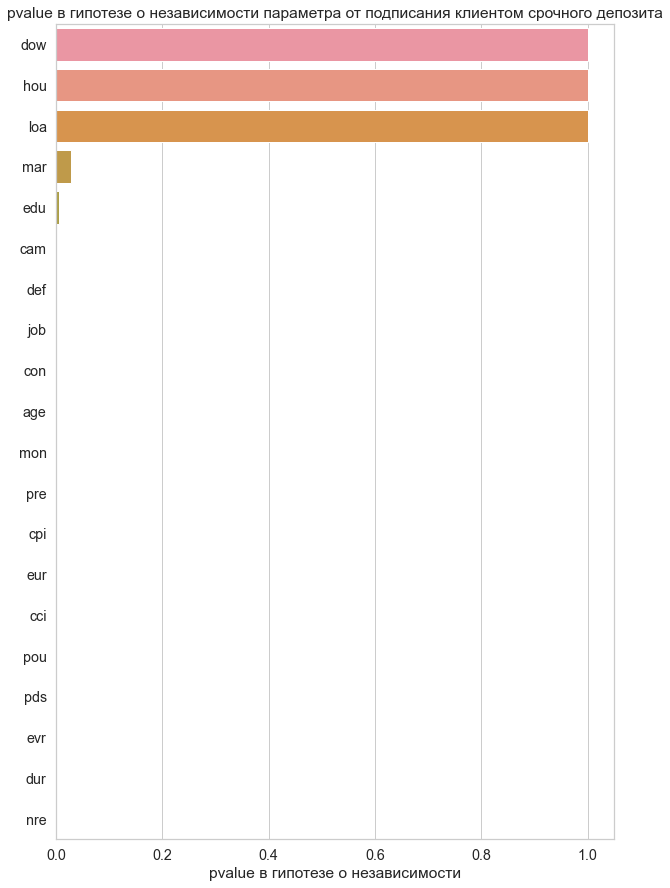

In [195]:
plt.figure(figsize=(10, 15))
sns.barplot(y=df.index, x=df['pvalscorr'])
plt.title('pvalue в гипотезе о независимости параметра от подписания клиентом срочного депозита')
plt.xlabel('pvalue в гипотезе о независимости')

Вторая часть: вычислив важность признаков, полученной с помощью Random Forest, разбив предварительно данные на обучающую и тестовую части.

In [168]:
enc_data = pd.get_dummies(data)
enc_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_0,y_1
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,1,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,1,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,1,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,1,0,0,0,1,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,1,0,0,0,1,0,0,1,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,1,0,0,0,0,0,1,0,1,0


In [179]:
enc_data = pd.get_dummies(data_categorial)
enc_data = enc_data.join(data_real)
enc_data

,emp.var.rate,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,poutcome_success,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-1.8,0,1,0,0,0,0,0,0,0,...,0,30,487,2,999,0,92.893,-46.2,1.313,5099.1
1,1.1,0,0,0,0,0,0,0,1,0,...,0,39,346,4,999,0,93.994,-36.4,4.855,5191.0
2,1.4,0,0,0,0,0,0,0,1,0,...,0,25,227,1,999,0,94.465,-41.8,4.962,5228.1
3,1.4,0,0,0,0,0,0,0,1,0,...,0,38,17,3,999,0,94.465,-41.8,4.959,5228.1
4,-0.1,1,0,0,0,0,0,0,0,0,...,0,47,58,1,999,0,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1.4,1,0,0,0,0,0,0,0,0,...,0,30,53,1,999,0,93.918,-42.7,4.958,5228.1
4115,1.4,1,0,0,0,0,0,0,0,0,...,0,39,219,1,999,0,93.918,-42.7,4.959,5228.1
4116,-1.8,0,0,0,0,0,0,0,0,1,...,0,27,64,2,999,1,92.893,-46.2,1.354,5099.1
4117,1.4,1,0,0,0,0,0,0,0,0,...,0,58,528,1,999,0,93.444,-36.1,4.966,5228.1


In [180]:
y = data['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: object

In [183]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(enc_data, y)

RandomForestRegressor()

In [193]:
fi = pd.Series(rf.feature_importances_, enc_data.columns)
fi = fi.sort_values(ascending=False)
fi

duration                0.320276
nr.employed             0.161383
age                     0.074384
euribor3m               0.066385
campaign                0.029559
                          ...   
marital_unknown         0.001105
housing_unknown         0.000975
loan_unknown            0.000858
education_illiterate    0.000000
default_yes             0.000000
Length: 63, dtype: float64

Text(0.5, 0, 'Важность признаков по Random Forest')

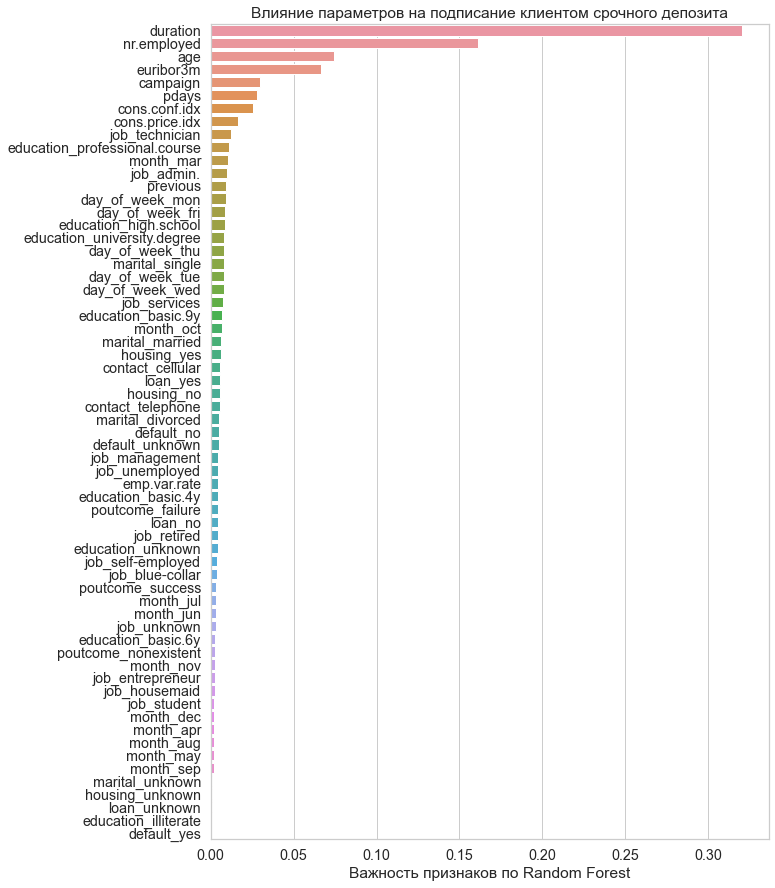

In [192]:
plt.figure(figsize=(10, 15))
sns.barplot(y=fi.index, x=fi)
plt.title('Влияние параметров на подписание клиентом срочного депозита')
plt.xlabel('Важность признаков по Random Forest')

**Вывод:** мы исследовали зависимость таргета от признаков двумя способами: с помощью критерия Пирсона для проверки независимости выборок и с помощью обученного `RandomForestRegressor`. Первый показал нам p-value, с помощью которого мы отвергали/не отвергали гипотезу о независимости выборок. В первом случае мы не отвергли независимость лишь трех параметров: `day_of_week`, `loan` и `housing`. Стоит отметить, что второй способ показал незначительную зависимость таргета от этих признаков, что нам позволяет сказать, что действительно эти признаки практически независимы с таргетом. Второй способ нам показал важность признаков для таргета, посчитанную с помощью обученного `RandomForestRegressor`. Самыми важными признаками стали `duration`, `nr.employed` и `age`, которые уверенно отверглись первым способом в гипотезе о независимости, из чего можно сделать вывод, что действительно эти признаки сильно влияют на таргет. Единственное, я не понял, зачем делить выборку на трейн и тест в данном случае, да и в семинарском ноутбуке мы не делили выборку, а обучались на всей. Мы же ничего не обучаем и не собираемся обучать, а, разделяя выборку, мы теряем часть данных (возможно, это помогает нам не переобучиться, но, кажется, `RandomForestRegressor` не страдает от такой проблемы). Объясните, пожалуйста, зачем это было делать:).